# 종합 통계 실습

## 비즈니스 시나리오

> 여러분은 식품·와인 유통 기업 **FreshCart**의 데이터 분석팀 인턴입니다. \
> 마케팅팀이 6차례 캠페인을 진행했지만 수락률이 낮아 경영진이 우려하고 있습니다. \
> 고객 데이터를 분석하여 **다음 캠페인의 집중 공략 전략**을 수립해 주세요.

---

| Part | 주제 | 핵심 질문 |
|------|------|-----------|
| **Part 0** | 데이터 전처리 | (코드 제공) |
| **Part 1** | 탐색적 데이터 분석 | 고객은 누구인가? |
| **Part 2** | 확률분포 모델링 | 고객 행동은 어떤 패턴을 따르는가? |
| **Part 3** | 추정과 가설검정 | 고소득 고객과 저소득 고객의 소비는 다른가? |
| **Part 4** | 고급 검정 | 교육, 결혼, 캠페인 반응의 관계는? |
| **Part 5** | 상관분석 / 비율 비교 | 변수 간 관계를 파악하고, 캠페인 효과를 검증할 수 있는가? |
| **Challenge** | 종합 분석 보고서 | 다음 캠페인 타겟은 누구인가? |

### 데이터 셋 개요

| 항목 | 내용 |
|------|------|
| **출처** | Kaggle |
| **URL** | https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis |
| **크기** | 약 2,240행 × 29열 |
| **파일명** | `marketing_campaign.csv` |
| **도메인** | 식품·와인 유통 기업 |

**설명:** 고객 성격 분석은 기업의 이상적인 고객을 심층 분석하는 방법론이다. 고객 세그먼트별 니즈·행동·관심사를 파악해 제품 및 마케팅을 최적화하는 데 활용한다.

---

### 변수 목록

#### 고객 정보

| # | 변수명 | 설명 |
|---|--------|------|
| 1 | `ID` | 고객 고유 식별자 |
| 2 | `Year_Birth` | 고객 출생연도 |
| 3 | `Education` | 최종 학력 |
| 4 | `Marital_Status` | 결혼 상태 |
| 5 | `Income` | 연간 가구 소득 |
| 6 | `Kidhome` | 가구 내 어린 자녀 수 |
| 7 | `Teenhome` | 가구 내 십대 자녀 수 |
| 8 | `Dt_Customer` | 고객 등록일 |
| 9 | `Recency` | 마지막 구매 이후 경과 일수 |

---

#### 소비 패턴 — 최근 2년간 지출 금액

| # | 변수명 | 설명 |
|---|--------|------|
| 10 | `MntWines` | 와인 지출 금액 |
| 11 | `MntFruits` | 과일 지출 금액 |
| 12 | `MntMeatProducts` | 육류 지출 금액 |
| 13 | `MntFishProducts` | 생선 지출 금액 |
| 14 | `MntSweetProducts` | 과자·디저트 지출 금액 |
| 15 | `MntGoldProds` | 골드 지출 금액 |

---

#### 캠페인 반응

| # | 변수명 | 설명 |
|---|--------|------|
| 16 | `NumDealsPurchases` | 할인 적용 구매 횟수 |
| 17 | `NumWebPurchases` | 웹사이트를 통한 구매 횟수 |
| 18 | `NumCatalogPurchases` | 카탈로그를 통한 구매 횟수 |
| 19 | `NumStorePurchases` | 오프라인 매장 구매 횟수 |
| 20 | `NumWebVisitsMonth` | 최근 한 달간 웹사이트 방문 횟수 |
| 21 | `AcceptedCmp3` | 3차 캠페인 제안 수락 여부 (1=수락, 0=거절) |
| 22 | `AcceptedCmp4` | 4차 캠페인 제안 수락 여부 |
| 23 | `AcceptedCmp5` | 5차 캠페인 제안 수락 여부 |
| 24 | `AcceptedCmp1` | 1차 캠페인 제안 수락 여부 |
| 25 | `AcceptedCmp2` | 2차 캠페인 제안 수락 여부 |
| 26 | `Complain` | 최근 2년 내 불만 제기 여부 (1=있음, 0=없음) |
| 27 | `Z_CostContact` | 상수값 3 — 캠페인 1회당 연락 비용 |
| 28 | `Z_Revenue` | 상수값 11 — 캠페인 성공 시 수익 |
| 29 | `Response` | 최종 캠페인 제안 수락 여부 **(타깃 변수)** |

<--코랩환경설정-->

In [79]:
#코랩 환경 라이브러리 불러오기
!pip install pingouin

#코랩 환경 폰트 설정

import subprocess
subprocess.run(['apt-get', 'install', '-y', 'fonts-nanum'], capture_output=True)

import matplotlib
import matplotlib.font_manager as fm

# 캐시 삭제
import os
cache_path = os.path.join(matplotlib.get_cachedir(), 'fontlist-v330.json')
if os.path.exists(cache_path):
    os.remove(cache_path)

# 나눔고딕 경로 직접 등록
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import trim_mean
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.proportion import (
    proportions_ztest, proportion_confint, proportion_effectsize
)
from statsmodels.stats.power import NormalIndPower, TTestIndPower
import pingouin as pg
import warnings
import platform

warnings.filterwarnings('ignore')

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

COLORS = {
    'blue': '#3B82F6', 'indigo': '#6366F1', 'violet': '#8B5CF6',
    'teal': '#14B8A6', 'emerald': '#10B981', 'amber': '#F59E0B',
    'rose': '#F43F5E', 'red': '#EF4444', 'slate': '#64748B',
    'sky': '#0EA5E9', 'purple': '#A855F7', 'lime': '#84CC16',
}

---
## Part 0: 데이터 전처리 (코드 제공)

아래 코드를 실행하여 분석에 사용할 데이터프레임 `df`를 준비합니다.
모든 파생변수가 생성되고 이상치가 제거된 상태에서 Part 1부터 분석을 시작합니다.

### 0-1. 데이터 로드 및 결측치 처리

In [81]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print(f"원본 데이터: {df.shape[0]}행 × {df.shape[1]}열")
print(f"Income 결측치: {df['Income'].isnull().sum()}개")

df['Income'] = df['Income'].fillna(df['Income'].median())

원본 데이터: 2240행 × 29열
Income 결측치: 24개


### 0-2. 파생변수 생성

In [82]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

df['Age'] = 2024 - df['Year_Birth']
df['Total_Spending'] = df[spending_cols].sum(axis=1)
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)
df['Total_Accepted'] = df[campaign_cols].sum(axis=1)
df['Has_Children'] = (df['Kidhome'] + df['Teenhome']) > 0
df['Income_Group'] = pd.qcut(df['Income'], 3, labels=['Low', 'Mid', 'High'])

bins = [0, 39, 49, 59, 200]
labels_age = ['30대 이하', '40대', '50대', '60대 이상']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels_age)

edu_map = {'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate',
           'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'}
df['Education_Group'] = df['Education'].map(edu_map)

marital_map = {'Married': 'Together', 'Together': 'Together',
               'Single': 'Single', 'Divorced': 'Single', 'Widow': 'Single',
               'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'}
df['Marital_Group'] = df['Marital_Status'].map(marital_map)

df['Campaign_Response'] = df['Total_Accepted'] > 0

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
reference_date = df['Dt_Customer'].max()
df['Customer_Days'] = (reference_date - df['Dt_Customer']).dt.days

print("파생변수 생성 완료:")
for col in ['Age', 'Total_Spending', 'Total_Purchases', 'Total_Accepted',
            'Has_Children', 'Income_Group', 'Age_Group', 'Education_Group',
            'Marital_Group', 'Campaign_Response', 'Customer_Days']:
    print(f"  - {col}: {df[col].dtype}")

파생변수 생성 완료:
  - Age: int64
  - Total_Spending: int64
  - Total_Purchases: int64
  - Total_Accepted: int64
  - Has_Children: bool
  - Income_Group: category
  - Age_Group: category
  - Education_Group: object
  - Marital_Group: object
  - Campaign_Response: bool
  - Customer_Days: int64


### 0-3. 이상치 제거

In [83]:
n_before = len(df)
df = df[(df['Age'] <= 100) & (df['Income'] <= 200000)].copy()
n_after = len(df)
print(f"이상치 제거: {n_before}행 → {n_after}행 ({n_before - n_after}행 제거)")
print(f"\n최종 데이터 요약:")
print(f"  Age 범위: {df['Age'].min()} ~ {df['Age'].max()}")
print(f"  Income 범위: {df['Income'].min():,.0f} ~ {df['Income'].max():,.0f}")
print(f"\n데이터 준비가 완료되었습니다. Part 1부터 분석을 시작하세요!")

이상치 제거: 2240행 → 2236행 (4행 제거)

최종 데이터 요약:
  Age 범위: 28 ~ 84
  Income 범위: 1,730 ~ 162,397

데이터 준비가 완료되었습니다. Part 1부터 분석을 시작하세요!


---
## Part 1: 탐색적 데이터 분석 — "고객은 누구인가?"

기술통계량과 시각화를 통해 FreshCart 고객의 특성을 파악합니다.

### 문제 1-1. 중심경향과 산포도

`Income`, `Total_Spending`, `Age` 세 변수에 대해 다음을 계산하세요.

| 중심경향 | 산포도 |
|----------|--------|
| 평균(mean) | 분산(variance) |
| 중앙값(median) | 표준편차(std) |
| 최빈값(mode) | 사분위범위(IQR) |
| 5% 절사평균(trimmed mean) | 변동계수(CV) |

In [84]:
vars_ = ['Income', 'Total_Spending', 'Age']

center = []
for v in vars_:
    s = df[v].dropna()
    center.append({
        'var': v,
        'mean': s.mean(),
        'median': s.median(),
        'mode': s.mode().iloc[0] if len(s.mode()) > 0 else np.nan,
        'trimmed_mean_5%': trim_mean(s, 0.05)
    })

center_df = pd.DataFrame(center).set_index('var').round(2)
center_df

,mean,median,mode,trimmed_mean_5%
var,,,,
Income,51952.61,51381.5,51381.5,51740.15
Total_Spending,605.99,396.5,46.0,561.12
Age,55.10,54.0,48.0,55.07


In [85]:
spread = []
for v in vars_:
    s = df[v].dropna()
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    var_ = s.var(ddof=1)
    std_ = s.std(ddof=1)
    cv = (std_ / s.mean()) * 100 if s.mean() != 0 else np.nan
    spread.append({
        'var': v,
        'variance(ddof=1)': var_,
        'std(ddof=1)': std_,
        'IQR': iqr,
        'CV(%)': cv
    })

spread_df = pd.DataFrame(spread).set_index('var').round(2)
spread_df

,variance(ddof=1),std(ddof=1),IQR,CV(%)
var,,,,
Income,4.584509e+08,21411.47,32773.25,41.21
Total_Spending,3.622417e+05,601.87,976.50,99.32
Age,1.369700e+02,11.70,18.00,21.24


### 문제 1-2. 분포 시각화

- **(a)** Income 히스토그램 + KDE + 평균/중앙값 수직선
- **(b)** Total_Spending 수평 박스플롯 + IQR 기준 이상치 개수 출력
- **(c)** Income_Group별 Total_Spending 바이올린 플롯

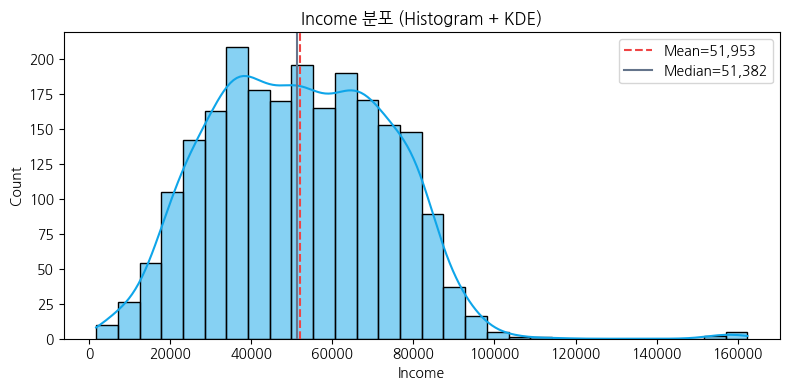

In [86]:
x = df['Income'].dropna()
mean_x, med_x = x.mean(), x.median()

plt.figure(figsize=(8,4))
sns.histplot(x, kde=True, bins=30, color=COLORS['sky'])
plt.axvline(mean_x, color=COLORS['red'], linestyle='--', label=f"Mean={mean_x:,.0f}")
plt.axvline(med_x, color=COLORS['slate'], linestyle='-', label=f"Median={med_x:,.0f}")
plt.title("Income 분포 (Histogram + KDE)")
plt.legend()
plt.tight_layout()
plt.show()

IQR = 976.50, lower = -1395.75, upper = 2510.25
IQR 기준 이상치 개수: 3


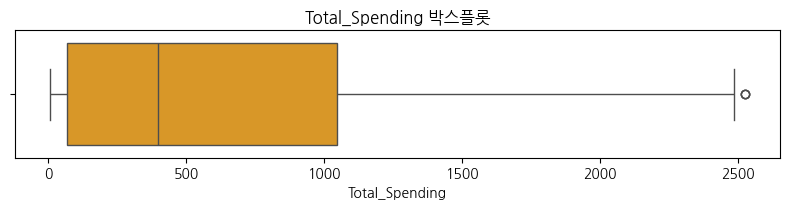

In [87]:
x = df['Total_Spending'].dropna()
q1, q3 = x.quantile(0.25), x.quantile(0.75)
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
outliers = x[(x < lower) | (x > upper)]
print(f"IQR = {iqr:.2f}, lower = {lower:.2f}, upper = {upper:.2f}")
print(f"IQR 기준 이상치 개수: {len(outliers)}")

plt.figure(figsize=(8,2.2))
sns.boxplot(x=x, orient='h', color=COLORS['amber'])
plt.title("Total_Spending 박스플롯")
plt.tight_layout()
plt.show()

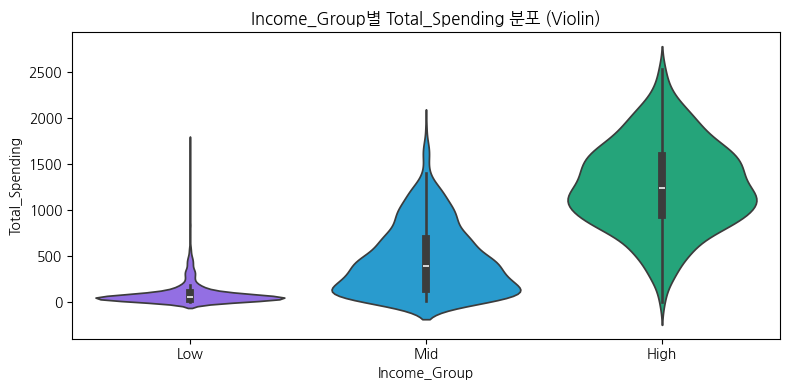

,count,mean,median
Income_Group,,,
Low,746,95.68,56.0
Mid,745,457.93,393.0
High,745,1265.04,1234.0


In [88]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x='Income_Group', y='Total_Spending', inner='box',
               palette=[COLORS['violet'], COLORS['sky'], COLORS['emerald']])
plt.title("Income_Group별 Total_Spending 분포 (Violin)")
plt.tight_layout()
plt.show()

df.groupby('Income_Group')['Total_Spending'].agg(['count','mean','median']).round(2)

### 문제 1-3. 왜도와 첨도

6개 소비 카테고리(MntWines ~ MntGoldProds)의 왜도(Skewness)와 첨도(Kurtosis)를 계산하고,
2×3 히스토그램 그리드를 그려 분포 형태를 비교하세요.

**왜도 해석**
- 왜도 > 0: 오른쪽 꼬리가 긴 분포
- 왜도 < 0: 왼쪽 꼬리가 긴 분포
- 왜도 ≈ 0: 좌우 대칭에 가까운 분포

**첨도 해석**
- 초과 첨도 > 0: 정규분포보다 중앙이 뾰족하고 꼬리가 두꺼운 분포
- 초과 첨도 < 0: 정규분포보다 중앙이 평평하고 꼬리가 얇은 분포
- 초과 첨도 ≈ 0: 정규분포와 유사한 형태

In [89]:
spending_names = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
hist_colors = [COLORS['blue'], COLORS['violet'], COLORS['teal'],
               COLORS['emerald'], COLORS['amber'], COLORS['rose']]

spending_cols_map = {
    'Wines': 'MntWines',
    'Fruits': 'MntFruits',
    'Meat': 'MntMeatProducts',
    'Fish': 'MntFishProducts',
    'Sweets': 'MntSweetProducts',
    'Gold': 'MntGoldProds'
}

sk = []
for name in spending_names:
    s = df[spending_cols_map[name]].dropna()
    sk.append({
        'category': name,
        'skewness': stats.skew(s, bias=False),
        'excess_kurtosis': stats.kurtosis(s, fisher=True, bias=False)
    })
sk_df = pd.DataFrame(sk).set_index('category').round(3)
sk_df

,skewness,excess_kurtosis
category,,
Wines,1.176,0.601
Fruits,2.104,4.070
Meat,2.085,5.530
Fish,1.920,3.096
Sweets,2.136,4.372
Gold,1.885,3.558


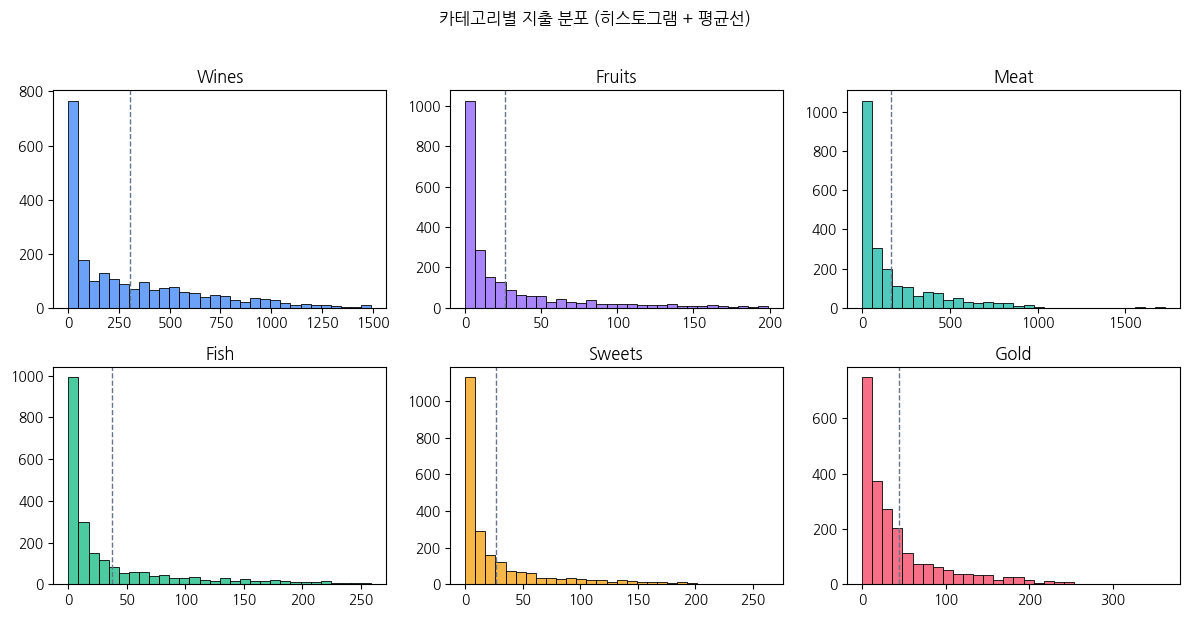

In [90]:
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes = axes.ravel()

for ax, name, col, color in zip(axes, spending_names, spending_cols_map.values(), hist_colors):
    s = df[col].dropna()
    sns.histplot(s, bins=30, kde=False, ax=ax, color=color)
    ax.axvline(s.mean(), color=COLORS['slate'], linestyle='--', linewidth=1)
    ax.set_title(name)
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.suptitle("카테고리별 지출 분포 (히스토그램 + 평균선)", y=1.02)
plt.tight_layout()
plt.show()

### 문제 1-4. 비즈니스 인사이트 정리

Part 1의 분석 결과를 바탕으로 다음을 정리하세요.

1. 고객 특성 요약 (연령, 소득, 소비 특성)
2. 핵심 발견 사항 (분포 특성, 그룹 간 차이)
3. 후속 분석에서 검증할 가설 (최소 3개)

### Part 1 인사이트 정리 (예시 답안)

1) **고객 특성 요약**
- 연령: `Age_Group` 기준으로 40~60대 분포가 중심인지(실제 분포/기술통계로 확인)
- 소득: `Income`은 평균과 중앙값이 크게 벌어지지 않아(왜도 작음) 비교적 안정적
- 소비: `Total_Spending`은 분산이 크고, 상위 고객이 전체 지출을 견인할 가능성(박스플롯/IQR 이상치)

2) **핵심 발견**
- `Income_Group`가 높을수록 `Total_Spending` 분포의 중심(중앙값/평균)이 상승하는지 확인
- 카테고리별 지출은 왜도/첨도에서 비대칭(우측 꼬리) 패턴이 나타나 “고액 구매 소수”가 존재할 수 있음

3) **후속 가설(최소 3개)**
- (가설 1) 고소득(Income_Group=High) 고객의 평균 총소비가 저소득(Low)과 유의하게 다르다.
- (가설 2) 자녀 보유 여부(Has_Children)에 따라 총소비 평균이 유의하게 다르다.
- (가설 3) 학력(Education_Group)에 따라 총소비가 유의하게 다르며, 특정 그룹 간 차이가 존재한다.
- (가설 4) 결혼상태(Marital_Group)와 캠페인 반응(Campaign_Response)은 독립이 아니다.


---
## Part 2: 확률분포 모델링 — "고객 행동은 어떤 패턴을 따르는가?"

실제 고객 데이터에 이론적 확률분포를 적합하여 고객 행동을 모델링합니다.

### 문제 2-1. 이항분포 — 캠페인 수락 모델링

`Response` 열에서 수락률 p를 계산하고, 이를 이항분포 B(n, p)에 적용합니다.

- **(a)** 10명 중 정확히 2명이 수락할 확률
  - B(n=10, p) 에서 P(X = 2) 계산

- **(b)** 10명 중 3명 이상이 수락할 확률
  - B(n=10, p) 에서 P(X ≥ 3) 계산

- **(c)** 이항분포 PMF 시각화
  - B(n=10, p) 의 모든 경우(X = 0, 1, ..., 10)에 대한
    이론 확률을 막대그래프로 그립니다.

- **(d)** n=100 으로 확장 — 세 가지 질문
  - **기대 수락자 수**: E(X) 계산
  - **15명 이상 수락 확률**: P(X ≥ 15) 계산
  - **90% 보장 최소 수락 수**: P(X ≤ k) ≥ 0.90 을 만족하는 최솟값 k 탐색

In [91]:
n_trial = 10

# 수락률 p (마지막 캠페인 Response 기준)
p = df['Response'].mean()
print(f"캠페인 수락률 p = {p:.4f}")

p_x2 = stats.binom.pmf(2, n_trial, p)
p_ge3 = stats.binom.sf(2, n_trial, p)  # P(X >= 3)

print(f"P(X=2)  (n=10) = {p_x2:.6f}")
print(f"P(X>=3) (n=10) = {p_ge3:.6f}")

캠페인 수락률 p = 0.1494
P(X=2)  (n=10) = 0.275215
P(X>=3) (n=10) = 0.178180


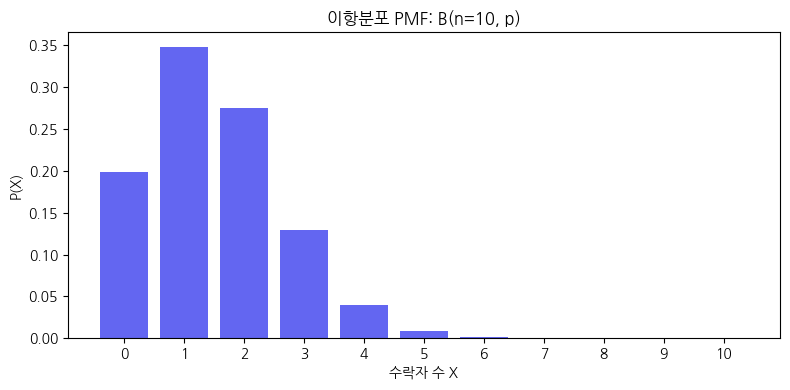

In [92]:
x = np.arange(0, n_trial+1)
pmf = stats.binom.pmf(x, n_trial, p)

plt.figure(figsize=(8,4))
plt.bar(x, pmf, color=COLORS['indigo'])
plt.title("이항분포 PMF: B(n=10, p)")
plt.xlabel("수락자 수 X")
plt.ylabel("P(X)")
plt.xticks(x)
plt.tight_layout()
plt.show()

In [93]:
n_campaign = 100

exp_x = n_campaign * p
p_ge15 = stats.binom.sf(14, n_campaign, p)  # P(X >= 15)

# P(X <= k) >= 0.90 를 만족하는 최소 k
k90 = None
for k in range(0, n_campaign+1):
    if stats.binom.cdf(k, n_campaign, p) >= 0.90:
        k90 = k
        break

print(f"E(X) (n=100) = {exp_x:.2f}")
print(f"P(X>=15) (n=100) = {p_ge15:.6f}")
print(f"P(X<=k) >= 0.90 를 만족하는 최소 k = {k90}")

E(X) (n=100) = 14.94
P(X>=15) (n=100) = 0.535806
P(X<=k) >= 0.90 를 만족하는 최소 k = 20


### 문제 2-2. 포아송 분포 — 웹사이트 방문 모델링

`NumWebVisitsMonth`(월간 웹 방문 수)에 포아송 분포를 적합합니다.

- **(a)** λ 추정 및 적합 평가
  - 표본 평균으로 λ를 추정하고,
    표본 평균 ≈ 표본 분산인지 확인하여 포아송 분포 적합 여부를 평가합니다.

- **(b)** 실측 vs 이론 PMF 시각화
  - 각 방문 횟수(0회, 1회, 2회, ...)별 실제 비율(실측 PMF)과
    포아송 분포의 이론 확률(이론 PMF)을 막대그래프로 겹쳐 그려 비교합니다.

- **(c)** 포아송 분포 활용 — 두 가지 실무 시나리오
  - **과다 방문 고객 비율**: P(X ≥ 10) 계산
    → 추정된 포아송 분포에서 월 10회 이상 방문할 확률이 몇 %인지 구합니다.
  - **서버 용량 계획**: 상위 5% 기준값 k 계산, 즉 P(X ≤ k) = 0.95 를 만족하는 k 탐색
    → 전체 고객의 95%를 커버할 수 있는 최대 방문 횟수를 구하고,
       이를 서버가 처리해야 할 기준 용량으로 활용합니다.

In [94]:
web_visits = df['NumWebVisitsMonth'].dropna()

lam = web_visits.mean()
var_ = web_visits.var(ddof=1)

print(f"람다(λ) 추정값 = {lam:.3f}")
print(f"표본 평균 = {lam:.3f}, 표본 분산 = {var_:.3f}")
print("평균≈분산 여부(포아송 적합성 힌트):", "유사" if abs(lam-var_)/lam < 0.2 else "차이 큼")

람다(λ) 추정값 = 5.319
표본 평균 = 5.319, 표본 분산 = 5.890
평균≈분산 여부(포아송 적합성 힌트): 유사


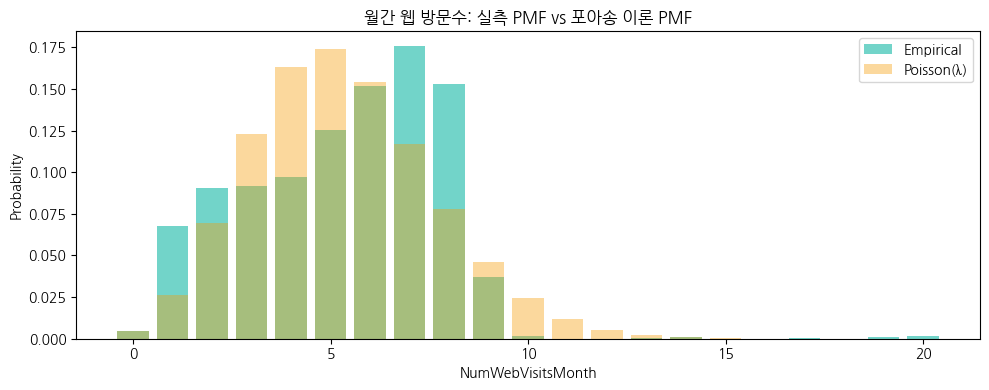

In [95]:
# 실측 PMF
emp = web_visits.value_counts().sort_index()
emp_pmf = emp / emp.sum()

# 이론 PMF (0 ~ max)
x = np.arange(0, int(web_visits.max())+1)
theo_pmf = stats.poisson.pmf(x, lam)

plt.figure(figsize=(10,4))
plt.bar(emp_pmf.index, emp_pmf.values, alpha=0.6, label="Empirical", color=COLORS['teal'])
plt.bar(x, theo_pmf, alpha=0.4, label="Poisson(λ)", color=COLORS['amber'])
plt.title("월간 웹 방문수: 실측 PMF vs 포아송 이론 PMF")
plt.xlabel("NumWebVisitsMonth")
plt.ylabel("Probability")
plt.legend()
plt.tight_layout()
plt.show()

In [96]:
p_ge10 = stats.poisson.sf(9, lam)  # P(X >= 10)

k95 = None
for k in range(0, 100):  # 충분히 큰 상한
    if stats.poisson.cdf(k, lam) >= 0.95:
        k95 = k
        break

print(f"P(X>=10) = {p_ge10:.6f} ({p_ge10*100:.2f}%)")
print(f"P(X<=k) >= 0.95 를 만족하는 최소 k = {k95}")

P(X>=10) = 0.044919 (4.49%)
P(X<=k) >= 0.95 를 만족하는 최소 k = 9


### 문제 2-3. 정규분포 — 소득 모델링

`Income`에 정규분포를 적합합니다.
Part 1에서 Income의 왜도가 작고 평균≈중앙값임을 확인했습니다. 정규분포가 잘 맞을까요?

- **(a)** μ, σ 추정 후 CDF로 P(Income < 30000), P(Income > 80000) 계산,
 PPF로 상위 10% 소득 기준값 계산 — **이론 확률과 실측 비율을 비교**하세요
- **(b)** 히스토그램 + 정규 분포 PDF와 겹쳐 그리기
- **(c)** 정규분포 활용 — 두 가지 질문
  - **VIP 기준선**: 상위 5% 소득 기준값
    → "이 금액 이상이면 VIP 고객으로 분류"
  - **할인 대상 기준선**: 하위 10% 소득 기준값
    → "이 금액 이하이면 할인 대상 고객으로 분류"


In [97]:
income = df['Income'].dropna()
mu = income.mean()
sigma = income.std(ddof=1)

p_lt_30000 = stats.norm.cdf(30000, loc=mu, scale=sigma)
p_gt_80000 = stats.norm.sf(80000, loc=mu, scale=sigma)
p90_cut = stats.norm.ppf(0.90, loc=mu, scale=sigma)

# 실측 비율
emp_lt_30000 = (income < 30000).mean()
emp_gt_80000 = (income > 80000).mean()
emp_ge_p90 = (income >= p90_cut).mean()

print(f"추정 μ={mu:.2f}, σ={sigma:.2f}")
print(f"[이론] P(Income<30000) = {p_lt_30000:.4f} / [실측] {emp_lt_30000:.4f}")
print(f"[이론] P(Income>80000) = {p_gt_80000:.4f} / [실측] {emp_gt_80000:.4f}")
print(f"상위 10% 기준값(이론 PPF) = {p90_cut:.2f}")
print(f"[실측] Income >= 기준값 비율 = {emp_ge_p90:.4f} (이론상 ~0.10)")

추정 μ=51952.61, σ=21411.47
[이론] P(Income<30000) = 0.1526 / [실측] 0.1655
[이론] P(Income>80000) = 0.0951 / [실측] 0.0962
상위 10% 기준값(이론 PPF) = 79392.51
[실측] Income >= 기준값 비율 = 0.1051 (이론상 ~0.10)


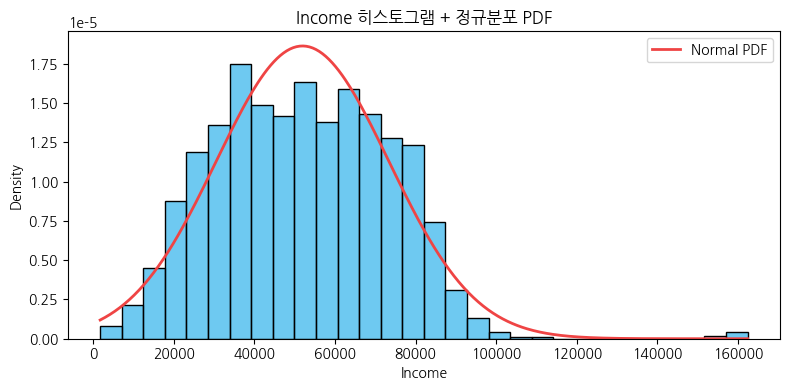

In [98]:
x = income
xs = np.linspace(x.min(), x.max(), 400)
pdf = stats.norm.pdf(xs, loc=mu, scale=sigma)

plt.figure(figsize=(8,4))
sns.histplot(x, bins=30, stat='density', color=COLORS['sky'], alpha=0.6)
plt.plot(xs, pdf, color=COLORS['red'], linewidth=2, label='Normal PDF')
plt.title("Income 히스토그램 + 정규분포 PDF")
plt.legend()
plt.tight_layout()
plt.show()

In [99]:
vip_cut = stats.norm.ppf(0.95, loc=mu, scale=sigma)   # 상위 5%
discount_cut = stats.norm.ppf(0.10, loc=mu, scale=sigma)  # 하위 10%

print(f"VIP(상위 5%) 소득 기준선: {vip_cut:,.0f}")
print(f"할인 대상(하위 10%) 소득 기준선: {discount_cut:,.0f}")

VIP(상위 5%) 소득 기준선: 87,171
할인 대상(하위 10%) 소득 기준선: 24,513


---
## Part 3: 추정과 가설검정 — "고소득 고객과 저소득 고객의 소비는 다른가?"

신뢰구간과 가설검정을 통해 고객 그룹 간 차이를 통계적으로 검증합니다.

### 문제 3-1. 신뢰구간 추정

- **(a)** Total_Spending 평균의 90%, 95%, 99% 신뢰구간을 계산하세요.
- **(b)** Income_Group별 95% CI를 계산하고 오차막대 그래프로 비교하세요.

CI = [x̄ - t × SE, x̄ + t × SE] (SE = s / √n)

In [100]:
x = df['Total_Spending'].dropna()
n = len(x)
mean_x = x.mean()
s = x.std(ddof=1)
se = s / np.sqrt(n)

def ci(mean, se, n, conf):
    alpha = 1 - conf
    tcrit = stats.t.ppf(1 - alpha/2, df=n-1)
    return mean - tcrit*se, mean + tcrit*se

for conf in [0.90, 0.95, 0.99]:
    lo, hi = ci(mean_x, se, n, conf)
    print(f"{int(conf*100)}% CI: [{lo:.2f}, {hi:.2f}]")

90% CI: [585.04, 626.93]
95% CI: [581.03, 630.95]
99% CI: [573.17, 638.80]


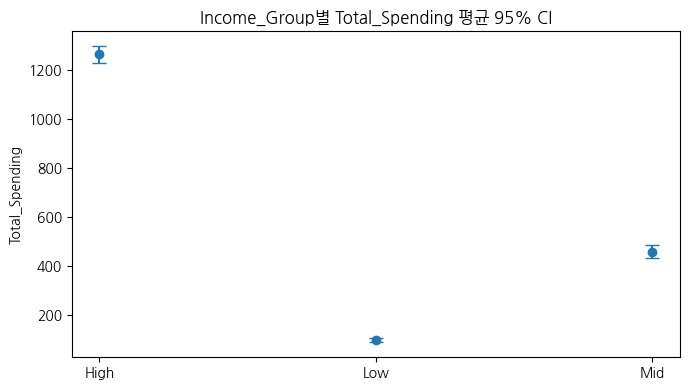

In [101]:
rows=[]
for g, sub in df.groupby('Income_Group'):
    x = sub['Total_Spending'].dropna()
    n = len(x)
    mean_x = x.mean()
    s = x.std(ddof=1)
    se = s/np.sqrt(n)
    lo, hi = ci(mean_x, se, n, 0.95)
    rows.append({'Income_Group': g, 'n': n, 'mean': mean_x, 'ci_low': lo, 'ci_high': hi})

ci_df = pd.DataFrame(rows).sort_values('Income_Group')
ci_df[['mean','ci_low','ci_high']] = ci_df[['mean','ci_low','ci_high']].round(2)
ci_df

plt.figure(figsize=(7,4))
xpos = np.arange(len(ci_df))
y = ci_df['mean'].values
yerr = np.vstack([y - ci_df['ci_low'].values, ci_df['ci_high'].values - y])

plt.errorbar(xpos, y, yerr=yerr, fmt='o', capsize=5)
plt.xticks(xpos, ci_df['Income_Group'])
plt.title("Income_Group별 Total_Spending 평균 95% CI")
plt.ylabel("Total_Spending")
plt.tight_layout()
plt.show()


### 문제 3-2. 독립표본 t-검정 (Welch's t-test)

**가설**: 자녀가 없는 고객의 총 소비가 자녀가 있는 고객과 다른가?

- H₀: μ_무자녀 = μ_유자녀
- H₁: μ_무자녀 ≠ μ_유자녀

Cohen's d 해석 기준: |d| < 0.5 작은, 0.5~0.8 중간, > 0.8 큰 효과

In [102]:
no_child = df[~df['Has_Children']]['Total_Spending'].dropna()
yes_child = df[df['Has_Children']]['Total_Spending'].dropna()

t_stat, p_value = stats.ttest_ind(no_child, yes_child, equal_var=False)

d = pg.compute_effsize(no_child, yes_child, eftype='cohen')

print("="*70)
print("[가설 설정]")
print("H₀: μ_무자녀 = μ_유자녀")
print("H₁: μ_무자녀 ≠ μ_유자녀")
print("α = 0.05")
print("="*70)

print(f"무자녀: n={len(no_child)}, mean={no_child.mean():.2f}")
print(f"유자녀: n={len(yes_child)}, mean={yes_child.mean():.2f}")
print(f"t = {t_stat:.4f}, p-value = {p_value:.6f}")
print(f"Cohen's d = {d:.4f}")

[가설 설정]
H₀: μ_무자녀 = μ_유자녀
H₁: μ_무자녀 ≠ μ_유자녀
α = 0.05
무자녀: n=637, mean=1104.86
유자녀: n=1599, mean=407.25
t = 24.9889, p-value = 0.000000
Cohen's d = 1.3599


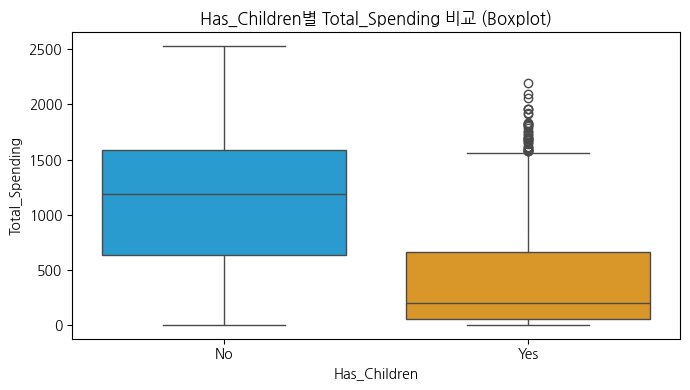

In [103]:
plt.figure(figsize=(7,4))
tmp = df[['Has_Children','Total_Spending']].copy()
tmp['Has_Children'] = tmp['Has_Children'].map({False:'No', True:'Yes'})
sns.boxplot(data=tmp, x='Has_Children', y='Total_Spending', palette=[COLORS['sky'], COLORS['amber']])
plt.title("Has_Children별 Total_Spending 비교 (Boxplot)")
plt.tight_layout()
plt.show()

### 문제 3-3. 대응표본 t-검정

같은 고객의 **와인 소비**(`MntWines`)와 **육류 소비**(`MntMeatProducts`)를 비교합니다.

- H₀: μ_Wine = μ_Meat (차이 = 0)
- H₁: μ_Wine ≠ μ_Meat

In [104]:
wines = df['MntWines']
meat = df['MntMeatProducts']

paired = pd.concat([wines, meat], axis=1).dropna()
wines = paired['MntWines']
meat = paired['MntMeatProducts']

diff = wines - meat

t_stat, p_value = stats.ttest_rel(wines, meat)
d_paired = diff.mean() / diff.std(ddof=1)

print("="*70)
print("[가설 설정]")
print("H₀: μ_Wine - μ_Meat = 0")
print("H₁: μ_Wine - μ_Meat ≠ 0")
print("α = 0.05")
print("="*70)

print(f"평균 차이(Wine-Meat) = {diff.mean():.2f}")
print(f"t = {t_stat:.4f}, p-value = {p_value:.6f}")
print(f"Cohen's d (paired) = {d_paired:.4f}")

[가설 설정]
H₀: μ_Wine - μ_Meat = 0
H₁: μ_Wine - μ_Meat ≠ 0
α = 0.05
평균 차이(Wine-Meat) = 137.14
t = 23.0929, p-value = 0.000000
Cohen's d (paired) = 0.4884


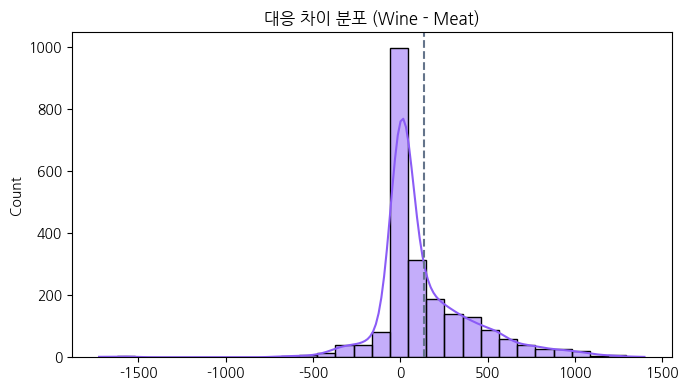

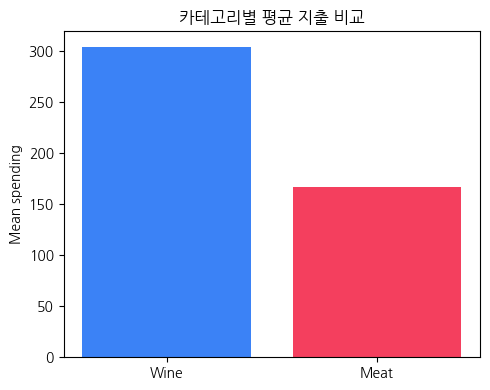

In [105]:
# (1) 차이 히스토그램
plt.figure(figsize=(7,4))
sns.histplot(diff, bins=30, kde=True, color=COLORS['violet'])
plt.axvline(diff.mean(), color=COLORS['slate'], linestyle='--')
plt.title("대응 차이 분포 (Wine - Meat)")
plt.tight_layout()
plt.show()

# (2) 평균 비교 막대그래프
means = pd.Series({'Wine': wines.mean(), 'Meat': meat.mean()})
plt.figure(figsize=(5,4))
plt.bar(means.index, means.values, color=[COLORS['blue'], COLORS['rose']])
plt.title("카테고리별 평균 지출 비교")
plt.ylabel("Mean spending")
plt.tight_layout()
plt.show()

### 문제 3-4. 검정력 분석

- **(a)** 문제 3-2의 효과 크기와 표본 크기를 사용하여 검정력(Power)을 계산하세요.
- **(b)** 작은 효과(d=0.2)를 탐지하기 위해 필요한 그룹당 표본 크기를 구하세요.

In [106]:
power_analysis = TTestIndPower()
import math
# (a) 문제 3-2의 효과크기와 표본크기로 power
effect = abs(d)
n1 = len(no_child)
n2 = len(yes_child)
ratio = n2 / n1

power = power_analysis.power(effect_size=effect, nobs1=n1, alpha=0.05, ratio=ratio, alternative='two-sided')
print(f"(a) 검정력 Power = {power:.4f}")

# (b) 작은 효과(d=0.2) 탐지를 위한 그룹당 표본 크기 (Power=0.80)
n_required = power_analysis.solve_power(effect_size=0.2, power=0.80, alpha=0.05, ratio=1.0, alternative='two-sided')
print(f"(b) d=0.2 탐지에 필요한 그룹당 표본수 ≈ {math.ceil(n_required)}")

(a) 검정력 Power = nan
(b) d=0.2 탐지에 필요한 그룹당 표본수 ≈ 394


---
## Part 4: 고급 검정 — "교육, 결혼, 캠페인 반응의 관계는?"

정규성 검정을 바탕으로 적절한 검정 방법을 선택하고,
범주형 변수 간 관계를 분석합니다.

### 문제 4-1. 정규성 + 등분산 검정

Education_Group별 Total_Spending의 정규성을 Shapiro-Wilk 검정과 Q-Q Plot으로 확인하세요.
정규성이 기각되더라도, 표본이 충분히 크면(n ≥ 30) 중심극한정리(CLT)에 의해
ANOVA가 여전히 강건(robust)합니다. 각 그룹의 표본 크기도 함께 확인하세요.

⚠️ **등분산성 위반은 CLT와 무관합니다** — 표본이 아무리 커도 해결되지 않습니다.
Levene 검정으로 등분산 가정을 확인하고, 위반 시 Welch's ANOVA를 사용합니다.

In [107]:
edu_groups = ['Undergraduate', 'Graduate', 'Postgraduate']

print("[Shapiro-Wilk 정규성 검정]")
group_series = []
for g in edu_groups:
    s = df[df['Education_Group']==g]['Total_Spending'].dropna()
    group_series.append(s)
    w, p = stats.shapiro(s)
    print(f"{g:>13}: n={len(s)}, W={w:.4f}, p={p:.6f}")

print("\n[Levene 등분산 검정]")
lev_stat, lev_p = stats.levene(*group_series, center='median')
print(f"stat={lev_stat:.4f}, p={lev_p:.6f}")

use_welch = lev_p < 0.05
print(f"→ 등분산 {'위반' if use_welch else '만족'}: use_welch = {use_welch}")

[Shapiro-Wilk 정규성 검정]
Undergraduate: n=255, W=0.7605, p=0.000000
     Graduate: n=1126, W=0.8743, p=0.000000
 Postgraduate: n=855, W=0.8765, p=0.000000

[Levene 등분산 검정]
stat=13.2893, p=0.000002
→ 등분산 위반: use_welch = True


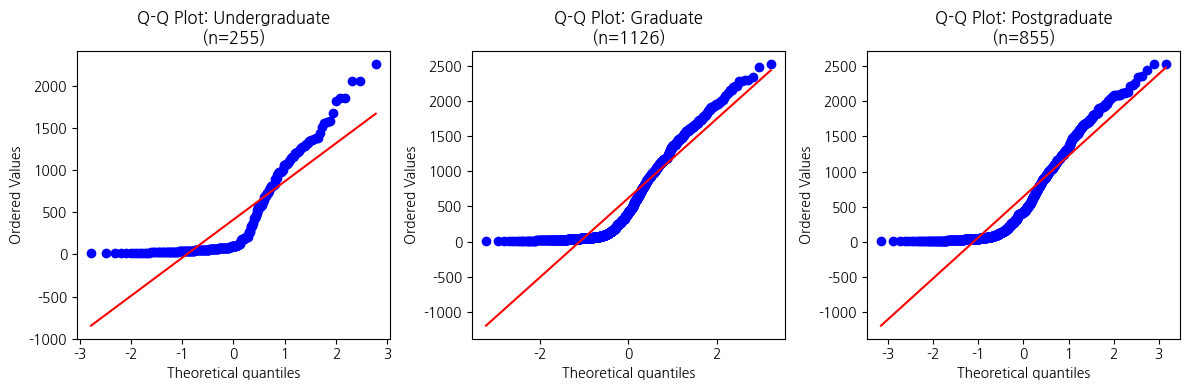

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
for ax, g in zip(axes, edu_groups):
    s = df[df['Education_Group']==g]['Total_Spending'].dropna()
    stats.probplot(s, dist="norm", plot=ax)
    ax.set_title(f"Q-Q Plot: {g}\n(n={len(s)})")
plt.tight_layout()
plt.show()

### 문제 4-2. ANOVA + 사후검정

문제 4-1의 정규성/등분산 검정 결과에 따라 적절한 검정을 수행합니다.

- 등분산 만족 → One-way ANOVA + **Tukey HSD** + Cohen's d
- 등분산 위반 → Welch's ANOVA + **Games-Howell** (`pg.pairwise_gameshowell()`) + Hedges' g
- 참고로 비모수 검정(Kruskal-Wallis)도 병행하여 결과의 일관성을 확인하세요.
- 효과 크기: η² + ω² (기준: 0.01 작은, 0.06 중간, 0.14 큰)
- 쌍별 효과 크기: Cohen's d / Hedges' g (기준: 0.2 미만 매우 작은, 0.2~0.5 작은, 0.5~0.8 중간, 0.8 이상 큰)

In [109]:
group_data = {g: df[df['Education_Group'] == g]['Total_Spending'].dropna().values for g in edu_groups}

# (참고) 비모수 Kruskal-Wallis
h_stat, h_p = stats.kruskal(*group_data.values())
print(f"[Kruskal-Wallis] H={h_stat:.4f}, p={h_p:.6f}")

if not use_welch:
    aov = pg.anova(dv='Total_Spending', between='Education_Group', data=df, detailed=True)
    print("\n[One-way ANOVA]")
    display(aov)

    ss_between = aov.loc[aov['Source']=='Education_Group','SS'].values[0]
    ss_within = aov.loc[aov['Source']=='Within','SS'].values[0]
    df_between = aov.loc[aov['Source']=='Education_Group','DF'].values[0]
    df_within = aov.loc[aov['Source']=='Within','DF'].values[0]
    ms_within = aov.loc[aov['Source']=='Within','MS'].values[0]
    ss_total = ss_between + ss_within

    eta2 = ss_between / ss_total
    omega2 = (ss_between - df_between*ms_within) / (ss_total + ms_within)
    print(f"η² = {eta2:.4f}, ω² = {omega2:.4f}")
else:
    welch = pg.welch_anova(dv='Total_Spending', between='Education_Group', data=df)
    print("\n[Welch's ANOVA]")
    display(welch)

[Kruskal-Wallis] H=36.6133, p=0.000000

[Welch's ANOVA]


,Source,ddof1,ddof2,F,p-unc,np2
0,Education_Group,2,751.708152,19.817377,4.098696e-09,0.0137


In [110]:
from itertools import combinations

if not use_welch:
    print("[Tukey HSD 사후검정]")
    tuk = pairwise_tukeyhsd(endog=df['Total_Spending'], groups=df['Education_Group'], alpha=0.05)
    print(tuk.summary())

    print("\n[쌍별 Cohen's d]")
    pairs=[]
    for a,b in combinations(edu_groups, 2):
        x = df[df['Education_Group']==a]['Total_Spending'].dropna()
        y = df[df['Education_Group']==b]['Total_Spending'].dropna()
        d = pg.compute_effsize(x, y, eftype='cohen')
        pairs.append((a,b,d))
    pd.DataFrame(pairs, columns=['group1','group2',"cohen_d"]).round(4)
else:
    print("[Games-Howell 사후검정]")
    gh = pg.pairwise_gameshowell(dv='Total_Spending', between='Education_Group', data=df)
    display(gh[['A','B','mean(A)','mean(B)','diff','pval','hedges']].round(4))

[Games-Howell 사후검정]


,A,B,mean(A),mean(B),diff,pval,hedges
0,Graduate,Postgraduate,620.3943,644.7918,-24.3975,0.6524,-0.0401
1,Graduate,Undergraduate,620.3943,412.2549,208.1394,0.0000,0.3557
2,Postgraduate,Undergraduate,644.7918,412.2549,232.5369,0.0000,0.3896


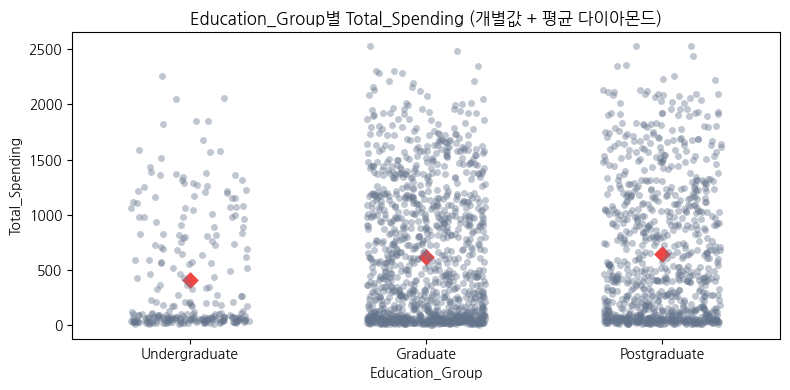

In [111]:
plt.figure(figsize=(8,4))
sns.stripplot(data=df, x='Education_Group', y='Total_Spending',
              order=edu_groups, jitter=0.25, alpha=0.4, color=COLORS['slate'])
sns.pointplot(data=df, x='Education_Group', y='Total_Spending',
              order=edu_groups, join=False, markers='D', scale=1.2,
              color=COLORS['red'], errorbar=None)
plt.title("Education_Group별 Total_Spending (개별값 + 평균 다이아몬드)")
plt.tight_layout()
plt.show()

### 문제 4-3. 카이제곱 독립성 검정

**가설**: 결혼 상태(Marital_Group)와 캠페인 반응(Campaign_Response)은 독립인가?

- H₀: Marital_Group과 Campaign_Response는 독립이다.
- H₁: 두 변수는 독립이 아니다.

- 효과크기: φ (phi) = √(χ² / n) (기준: 0.1 작은, 0.3 중간, 0.5 큰)
- 오즈비(Odds Ratio): OR = (a×d) / (b×c), 95% CI = exp(ln(OR) ± 1.96 × SE)

> ⚠️ Cochran 규칙: 기대빈도 < 5인 셀이 전체의 20% 초과 시 Fisher 정확검정 필요

In [112]:
crosstab_no_margin = pd.crosstab(df['Marital_Group'], df['Campaign_Response'])
print("[교차표]")
display(crosstab_no_margin)

chi2, p, dof, expected = stats.chi2_contingency(crosstab_no_margin)
print(f"\n[카이제곱 독립성 검정] chi2={chi2:.4f}, dof={dof}, p={p:.6f}")

expected_df = pd.DataFrame(expected, index=crosstab_no_margin.index, columns=crosstab_no_margin.columns)
# Cochran 규칙: 기대빈도 < 5 비율
low_exp_ratio = (expected_df < 5).sum().sum() / expected_df.size
print(f"기대빈도<5 비율: {low_exp_ratio:.2%}")

n = crosstab_no_margin.values.sum()
phi = np.sqrt(chi2 / n)
print(f"효과크기 φ(phi) = {phi:.4f}")

# 2x2일 때 OR 계산
if crosstab_no_margin.shape == (2,2):
    a = crosstab_no_margin.iloc[0,0]
    b = crosstab_no_margin.iloc[0,1]
    c = crosstab_no_margin.iloc[1,0]
    d = crosstab_no_margin.iloc[1,1]
    or_ = (a*d) / (b*c) if (b*c) != 0 else np.inf
    se = np.sqrt(1/a + 1/b + 1/c + 1/d)
    ci_low = np.exp(np.log(or_) - 1.96*se)
    ci_high = np.exp(np.log(or_) + 1.96*se)
    print(f"Odds Ratio = {or_:.4f}, 95% CI = [{ci_low:.4f}, {ci_high:.4f}]")

# 표준화 잔차
std_resid = (crosstab_no_margin - expected_df) / np.sqrt(expected_df)


[교차표]


Campaign_Response,False,True
Marital_Group,,
Single,547,247
Together,1081,361



[카이제곱 독립성 검정] chi2=9.2368, dof=1, p=0.002372
기대빈도<5 비율: 0.00%
효과크기 φ(phi) = 0.0643
Odds Ratio = 0.7396, 95% CI = [0.6105, 0.8959]


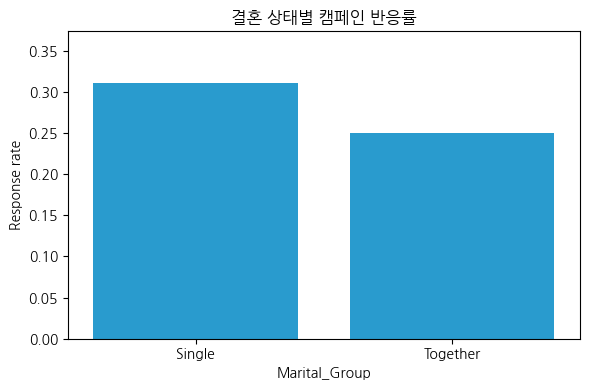

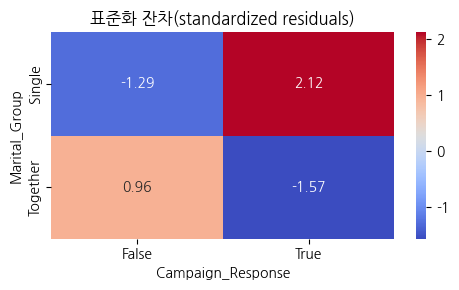

In [113]:
# (1) 결혼 상태별 반응률
resp_rate = df.groupby('Marital_Group')['Campaign_Response'].mean().reindex(crosstab_no_margin.index)

plt.figure(figsize=(6,4))
sns.barplot(x=resp_rate.index, y=resp_rate.values, color=COLORS['sky'])
plt.title("결혼 상태별 캠페인 반응률")
plt.ylabel("Response rate")
plt.ylim(0, resp_rate.max()*1.2)
plt.tight_layout()
plt.show()

# (2) 표준화 잔차 히트맵
plt.figure(figsize=(5,3))
sns.heatmap(std_resid, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("표준화 잔차(standardized residuals)")
plt.tight_layout()
plt.show()

### 문제 4-4. 적합도 검정

3개 구매 채널(Web, Catalog, Store)의 총 구매 비율이 균등하게 분포하는지 검정합니다.

- H₀: 세 채널의 구매 비율이 동일하다 (1/3 : 1/3 : 1/3)
- H₁: 세 채널의 구매 비율이 동일하지 않다

Cohen's w = √(Σ(p_obs - p_exp)² / p_exp)

In [114]:
channel_totals = df[purchase_cols].sum()
channel_names = ['Web', 'Catalog', 'Store']
observed = channel_totals.values
total = observed.sum()
expected = np.array([total/3]*3)

chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"관측치: {dict(zip(channel_names, observed))}")
print(f"기대치(균등): {dict(zip(channel_names, expected.round(2)))}")
print(f"chi2={chi2_stat:.4f}, p={p_value:.6f}")

p_obs = observed / total
p_exp = expected / total
w = np.sqrt(((p_obs - p_exp)**2 / p_exp).sum())
print(f"Cohen's w = {w:.4f}")

관측치: {'Web': np.int64(9140), 'Catalog': np.int64(5955), 'Store': np.int64(12959)}
기대치(균등): {'Web': np.float64(9351.33), 'Catalog': np.float64(9351.33), 'Store': np.float64(9351.33)}
chi2=2630.1063, p=0.000000
Cohen's w = 0.3062


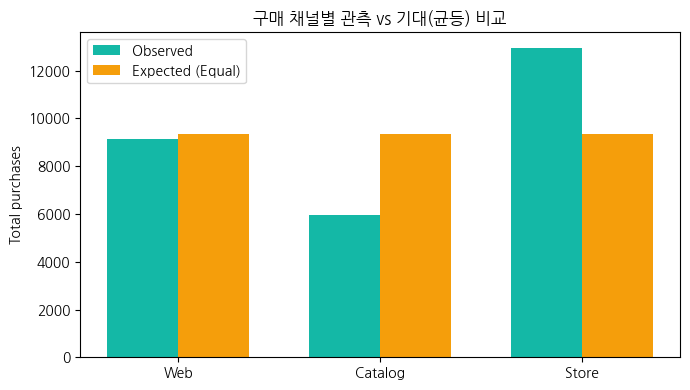

In [115]:
x = np.arange(len(channel_names))
width = 0.35

plt.figure(figsize=(7,4))
plt.bar(x - width/2, observed, width=width, label='Observed', color=COLORS['teal'])
plt.bar(x + width/2, expected, width=width, label='Expected (Equal)', color=COLORS['amber'])
plt.xticks(x, channel_names)
plt.title("구매 채널별 관측 vs 기대(균등) 비교")
plt.ylabel("Total purchases")
plt.legend()
plt.tight_layout()
plt.show()

---
## Part 5: 상관분석 / 비율 비교 — "변수 간 관계를 파악하고, 캠페인 효과를 검증할 수 있는가?"

변수 간 상관관계를 분석하고, A/B 테스트로 캠페인 효과를 검증합니다.

### 문제 5-1. 상관분석

6개 변수의 Pearson/Spearman 상관계수를 계산하고 히트맵으로 시각화하세요.
주요 변수 쌍에 대해 유의성 검정도 수행합니다.

In [116]:
corr_vars = ['Income', 'Age', 'Total_Spending', 'Total_Purchases',
             'NumWebVisitsMonth', 'Recency']

pearson_corr = df[corr_vars].corr(method='pearson')
spearman_corr = df[corr_vars].corr(method='spearman')

print("[Pearson 상관계수]")
display(pearson_corr.round(3))
print("\n[Spearman 상관계수]")
display(spearman_corr.round(3))

# 주요 변수쌍 유의성 검정 (Pearson)
pairs = [
    ('Income', 'Total_Spending'),
    ('NumWebVisitsMonth', 'Total_Spending'),
    ('Total_Spending', 'Total_Purchases')
]
tests=[]
for a,b in pairs:
    r = pg.corr(df[a], df[b], method='pearson')
    r['pair'] = f"{a} vs {b}"
    tests.append(r[['pair','n','r','p-val']])
pd.concat(tests, ignore_index=True).round(4)

[Pearson 상관계수]


,Income,Age,Total_Spending,Total_Purchases,NumWebVisitsMonth,Recency
Income,1.000,0.199,0.789,0.739,-0.646,0.008
Age,0.199,1.000,0.114,0.173,-0.117,0.019
Total_Spending,0.789,0.114,1.000,0.821,-0.500,0.021
Total_Purchases,0.739,0.173,0.821,1.000,-0.427,0.006
NumWebVisitsMonth,-0.646,-0.117,-0.500,-0.427,1.000,-0.022
Recency,0.008,0.019,0.021,0.006,-0.022,1.000



[Spearman 상관계수]


,Income,Age,Total_Spending,Total_Purchases,NumWebVisitsMonth,Recency
Income,1.000,0.217,0.849,0.777,-0.640,0.010
Age,0.217,1.000,0.158,0.179,-0.129,0.020
Total_Spending,0.849,0.158,1.000,0.908,-0.477,0.020
Total_Purchases,0.777,0.179,0.908,1.000,-0.421,0.012
NumWebVisitsMonth,-0.640,-0.129,-0.477,-0.421,1.000,-0.022
Recency,0.010,0.020,0.020,0.012,-0.022,1.000


,pair,n,r,p-val
0,Income vs Total_Spending,2236,0.7894,0.0
1,NumWebVisitsMonth vs Total_Spending,2236,-0.4999,0.0
2,Total_Spending vs Total_Purchases,2236,0.8211,0.0


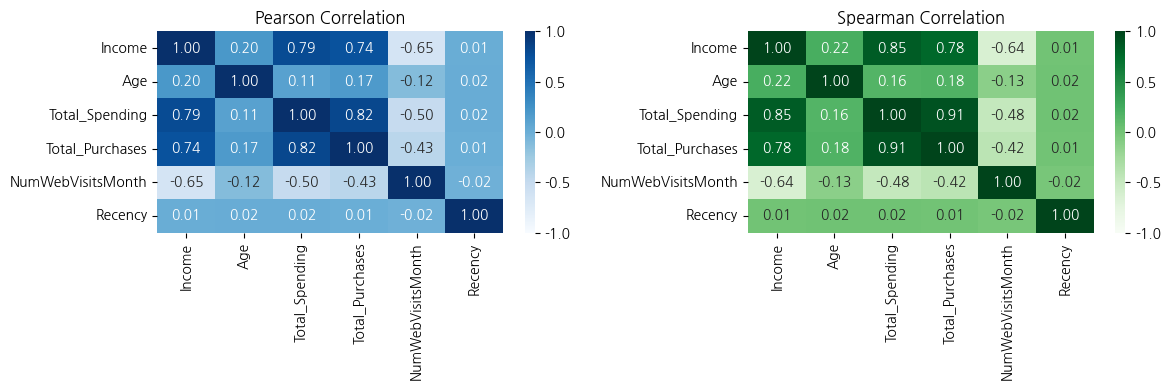

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.heatmap(pearson_corr, annot=True, fmt=".2f", ax=axes[0], cmap="Blues", vmin=-1, vmax=1)
axes[0].set_title("Pearson Correlation")

sns.heatmap(spearman_corr, annot=True, fmt=".2f", ax=axes[1], cmap="Greens", vmin=-1, vmax=1)
axes[1].set_title("Spearman Correlation")

plt.tight_layout()
plt.show()

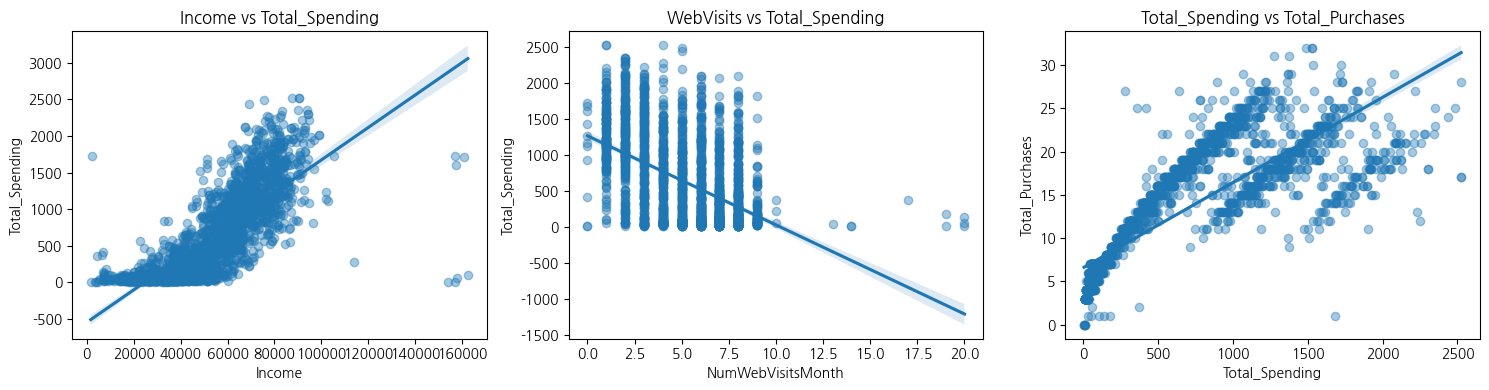

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.regplot(data=df, x='Income', y='Total_Spending', ax=axes[0], scatter_kws={'alpha':0.4})
axes[0].set_title("Income vs Total_Spending")

sns.regplot(data=df, x='NumWebVisitsMonth', y='Total_Spending', ax=axes[1], scatter_kws={'alpha':0.4})
axes[1].set_title("WebVisits vs Total_Spending")

sns.regplot(data=df, x='Total_Spending', y='Total_Purchases', ax=axes[2], scatter_kws={'alpha':0.4})
axes[2].set_title("Total_Spending vs Total_Purchases")

plt.tight_layout()
plt.show()

### 문제 5-2. 두 그룹 비율 비교 (관찰 연구)

이전 캠페인 반응 경험 유무에 따라 마지막 캠페인(Response) 수락률에 차이가 있는지 검증합니다.

- **Group A**: AcceptedCmp1~5 합계 = 0 (이전 캠페인 무반응)
- **Group B**: AcceptedCmp1~5 합계 ≥ 1 (이전 캠페인 반응 경험)
- **지표**: Response (마지막 캠페인 수락률)
- **검정 방법**: z-비율검정 + Cohen's h + Wilson 신뢰구간

> **주의**: 이 분석은 A/B 테스트가 **아닙니다**. \
> A/B 테스트는 연구자가 참가자를 **무작위로 배정** (Random Assignment)하는 실험입니다. \
> 여기서는 고객이 과거 행동에 의해 스스로 그룹에 배정되었으므로 **관찰 연구**이며, \
> 인과관계를 주장할 수 없습니다.

In [119]:
cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Prior_Response'] = df[cmp_cols].sum(axis=1)

group_a = df[df['Prior_Response'] == 0]
group_b = df[df['Prior_Response'] >= 1]

n_a, n_b = len(group_a), len(group_b)
conv_a = group_a['Response'].sum()
conv_b = group_b['Response'].sum()
rate_a = conv_a / n_a
rate_b = conv_b / n_b

# (a) z-비율검정
z_stat, p_val = proportions_ztest([conv_a, conv_b], [n_a, n_b], alternative='two-sided')
print(f"Group A(무반응): {conv_a}/{n_a} = {rate_a:.4f}")
print(f"Group B(반응경험): {conv_b}/{n_b} = {rate_b:.4f}")
print(f"z = {z_stat:.4f}, p = {p_val:.6f}")

# (b) Cohen's h
h = proportion_effectsize(rate_b, rate_a)  # B vs A
print(f"Cohen's h = {h:.4f}")

# (c) Wilson 신뢰구간
ci_a = proportion_confint(conv_a, n_a, alpha=0.05, method='wilson')
ci_b = proportion_confint(conv_b, n_b, alpha=0.05, method='wilson')
print(f"Wilson 95% CI (A): [{ci_a[0]:.4f}, {ci_a[1]:.4f}]")
print(f"Wilson 95% CI (B): [{ci_b[0]:.4f}, {ci_b[1]:.4f}]")

Group A(무반응): 146/1774 = 0.0823
Group B(반응경험): 188/462 = 0.4069
z = -17.4357, p = 0.000000
Cohen's h = 0.8016
Wilson 95% CI (A): [0.0704, 0.0960]
Wilson 95% CI (B): [0.3631, 0.4523]


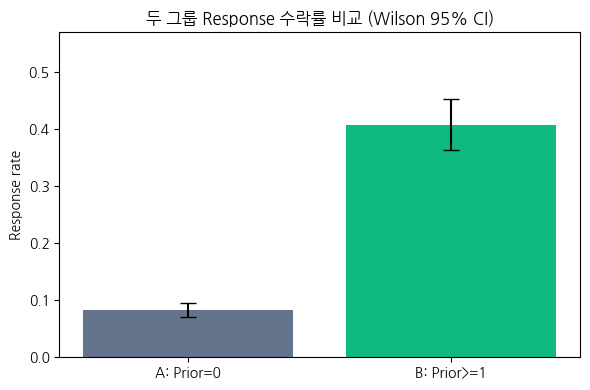

In [120]:
rates = [rate_a, rate_b]
cis = [ci_a, ci_b]
labels = ['A: Prior=0', 'B: Prior>=1']

yerr = np.array([
    [rates[i] - cis[i][0] for i in range(2)],
    [cis[i][1] - rates[i] for i in range(2)]
])

plt.figure(figsize=(6,4))
plt.bar(labels, rates, yerr=yerr, capsize=6, color=[COLORS['slate'], COLORS['emerald']])
plt.ylim(0, max(rates)*1.4)
plt.title("두 그룹 Response 수락률 비교 (Wilson 95% CI)")
plt.ylabel("Response rate")
plt.tight_layout()
plt.show()

> ⚠️ **이 분석이 A/B 테스트가 아닌 이유**
>
> A/B 테스트의 본질은 '무작위 배정(Random Assignment)'입니다.
>
> - **A/B 테스트**: 연구자가 참가자를 무작위로 배정 → 인과관계 추론 가능
> - **이 분석**: 고객의 과거 행동으로 그룹이 결정 → 관찰 연구, 인과관계 주장 불가
>
> → 인과관계를 검증하려면 무작위 배정 실험(RCT)을 설계해야 합니다. (문제 5-3)

### 문제 5-3. 진정한 A/B 테스트 설계

새로운 캠페인이 기존 수락률 대비 **2%p** 개선을 가져올 수 있는지 탐지하기 위한
최소 표본 크기를 산정하세요. (α=0.05, Power=0.80)

In [121]:
baseline_rate = df['Response'].mean()
target_rate = baseline_rate + 0.02

# (a) Cohen's h
h = proportion_effectsize(target_rate, baseline_rate)
print(f"baseline = {baseline_rate:.4f}, target = {target_rate:.4f}")
print(f"Cohen's h = {h:.4f}")

# (b) 필요 표본수
power_analysis = NormalIndPower()
n_per_group = power_analysis.solve_power(effect_size=h, power=0.80, alpha=0.05, ratio=1.0, alternative='two-sided')
print(f"그룹당 필요 표본수 ≈ {math.ceil(n_per_group)} (총 ≈ {2*math.ceil(n_per_group)})")

baseline = 0.1494, target = 0.1694
Cohen's h = 0.0547
그룹당 필요 표본수 ≈ 5253 (총 ≈ 10506)


---
## Challenge: 종합 분석 보고서

지금까지의 분석을 종합하여 FreshCart 마케팅팀에 제출할 보고서를 작성합니다.

### Challenge 1. 고객 그룹별 특성 분석

`Income_Group` × `Has_Children` 6개 조합에 대해 다음을 포함하는 종합 분석표를 작성하세요:

- 고객 수, 평균 소득, 평균/중앙값 소비, 평균 구매 수, 캠페인 반응률, 웹 방문 수
- 그룹 비교 시각화 (1×3 서브플롯: 평균 소비, 반응률, 고객 수)

,Income_Group,Has_Children,n,mean_income,mean_spending,median_spending,mean_purchases,response_rate,mean_web_visits
0,Low,False,115,24380.24,145.01,73.0,6.40,0.10,6.93
1,Low,True,631,29172.88,86.69,54.0,5.67,0.12,6.90
2,Mid,False,80,52209.63,721.24,653.0,15.36,0.19,4.68
3,Mid,True,665,51466.09,426.25,368.0,12.34,0.09,5.87
4,High,False,442,78697.96,1424.02,1383.0,19.22,0.32,2.37
5,High,True,303,71841.61,1033.12,1005.0,19.18,0.10,4.68


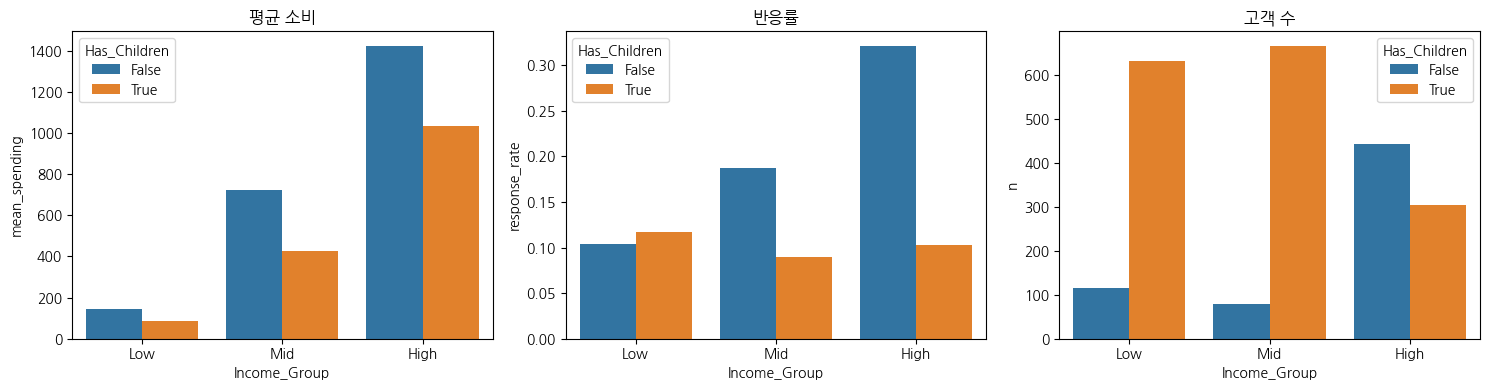

In [122]:
# Income_Group × Has_Children 조합 분석표
grp = (df
       .groupby(['Income_Group','Has_Children'])
       .agg(
           n=('Income','size'),
           mean_income=('Income','mean'),
           mean_spending=('Total_Spending','mean'),
           median_spending=('Total_Spending','median'),
           mean_purchases=('Total_Purchases','mean'),
           response_rate=('Response','mean'),
           mean_web_visits=('NumWebVisitsMonth','mean')
       )
       .reset_index())

grp = grp.sort_values(['Income_Group','Has_Children'])
grp_round = grp.copy()
for c in ['mean_income','mean_spending','median_spending','mean_purchases','response_rate','mean_web_visits']:
    grp_round[c] = grp_round[c].round(2)
display(grp_round)

# 시각화 (1×3): 평균 소비, 반응률, 고객 수
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.barplot(data=grp, x='Income_Group', y='mean_spending', hue='Has_Children', ax=axes[0])
axes[0].set_title("평균 소비")

sns.barplot(data=grp, x='Income_Group', y='response_rate', hue='Has_Children', ax=axes[1])
axes[1].set_title("반응률")

sns.barplot(data=grp, x='Income_Group', y='n', hue='Has_Children', ax=axes[2])
axes[2].set_title("고객 수")

plt.tight_layout()
plt.show()

### Challenge 2. 비즈니스 제안서

분석 결과를 종합하여 다음을 포함하는 제안서를 작성하세요:

1. **타겟 고객**: 어떤 그룹를 우선 집중 공략해야 하는가? (근거 포함)
2. **채널 전략**: 소득 그룹별 최적 마케팅 채널은?
3. **기대 효과**: 집중 공략 기반 예상 개선 효과
4. **한계점**: 분석의 한계와 추가 필요 데이터

### 비즈니스 제안서

1) **타겟 고객(우선 공략)**
- `Income_Group`가 높고(`High`) `Total_Spending` 평균이 높은 조합을 1차 타겟으로 설정  
- 추가로 `Response`(마지막 캠페인 수락률)가 상대적으로 높은 그룹(Challenge 1 표의 `response_rate`)을 우선순위로 둠  
- 근거: “지출 규모(매출 기여)”와 “반응 가능성(전환)”을 동시에 최대화

2) **채널 전략(소득 그룹별)**
- 구매 채널 총량(Part 4-4) 및 그룹별 구매수(`Total_Purchases`, `NumWebVisitsMonth`)를 참고하여  
  - Web 방문이 많은 그룹: 웹/모바일 메시지 중심  
  - Catalog/Store 구매 비중이 높은 그룹: 오프라인/카탈로그 연계 쿠폰

3) **기대 효과(정량적 관점)**
- 과거 반응 경험 그룹(B)의 마지막 캠페인 수락률이 A보다 유의하게 높다면(Part 5-2)  
  - “반응 경험 고객”을 리타겟팅하는 캠페인에서 단기 개선 여지가 큼  
- 개선 목표가 +2%p라면, Part 5-3의 표본 크기 산정 결과를 기준으로 실험 설계

4) **한계점 / 추가 데이터**
- Part 5-2는 관찰 연구로 인과를 주장할 수 없음(무작위 배정 아님)  
- 채널별 캠페인 노출/클릭/구매 전환 경로 데이터가 있으면 더 정교한 최적화 가능  
- 캠페인별 메시지/할인율/노출 빈도 등의 실험 설계 변수가 필요
